# Movie classification (Classification trees)
the purpose of this model is triying to predict if a movie will obtain a Star Tech Oscar

## Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Movie_classification.csv", header = 0)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [4]:
df.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510,0.545455
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764,0.498422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000,1.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000


## Missing values treatment

In [5]:
df = df.fillna(df.mean())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Dummy varaible creation

In [7]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


## Train and test data creation

In [8]:
x = df.loc[:, df.columns != "Start_Tech_Oscar"]
y = df["Start_Tech_Oscar"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
x_train.shape

(404, 20)

In [12]:
x_test.shape

(102, 20)

## Training classification tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clftree = DecisionTreeClassifier(max_depth = 3)

In [15]:
clftree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
#Predicting values
y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)

## Model performance

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
confusion_matrix(y_train, y_train_pred)

array([[172,  14],
       [126,  92]], dtype=int64)

In [19]:
accuracy_score(y_train, y_train_pred)

0.6534653465346535

In [20]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]], dtype=int64)

In [21]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

## Plotting decision tree

In [22]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

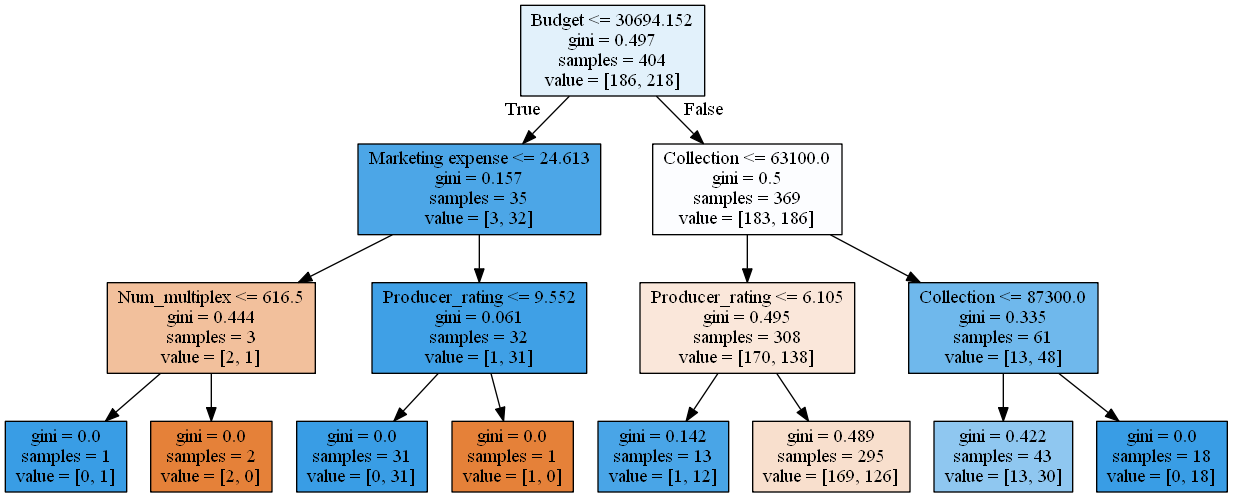

In [23]:
dot_data = export_graphviz(clftree, out_file = None, feature_names = x_train.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling tree growth

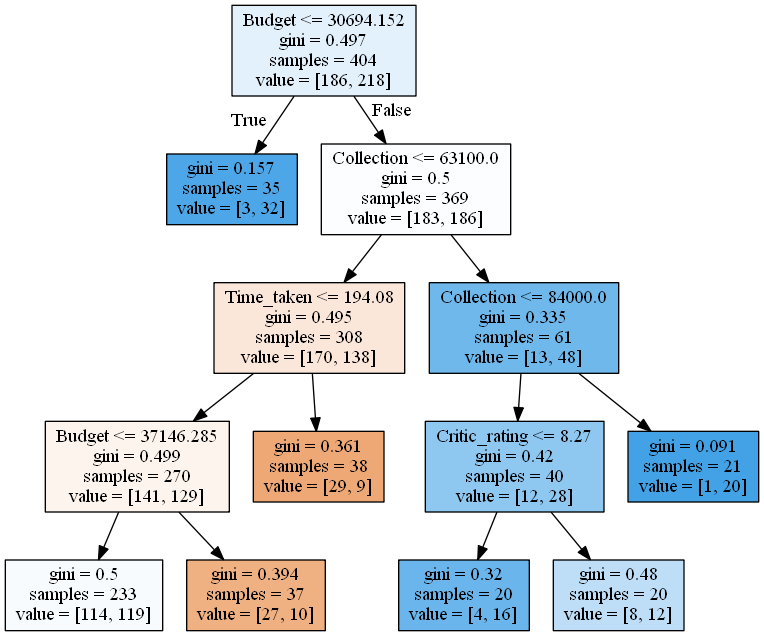

In [24]:
clftree2 = DecisionTreeClassifier(min_samples_leaf = 20, max_depth = 4)
clftree2.fit(x_train, y_train)
dot_data = export_graphviz(clftree2, out_file = None, feature_names = x_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [25]:
y_test_pred2 = clftree2.predict(x_test)
accuracy_score(y_test, y_test_pred2)

0.5588235294117647

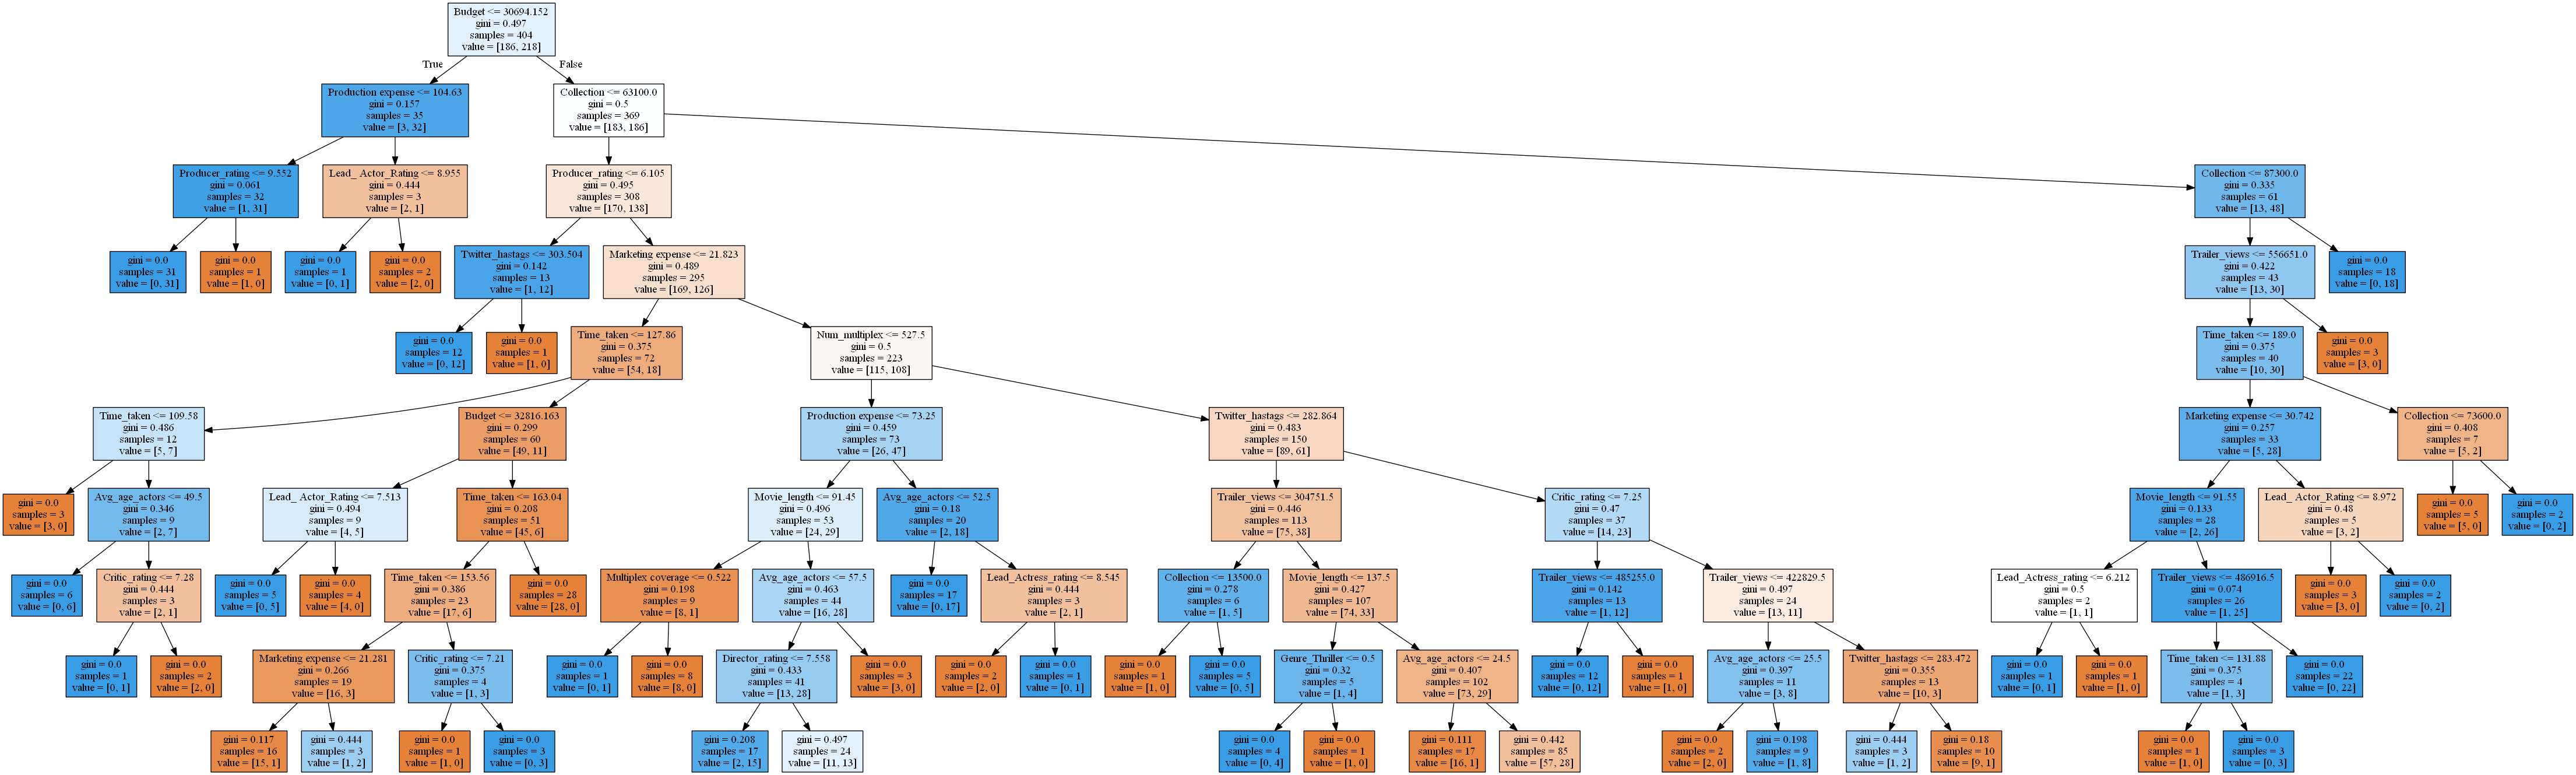

In [26]:
clftree3 = DecisionTreeClassifier(max_depth = 9, random_state = 0)
clftree3.fit(x_train, y_train)
dot_data = export_graphviz(clftree3, out_file = None, feature_names = x_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

In [27]:
y_train_pred3 = clftree3.predict(x_train)
y_test_pred3 = clftree3.predict(x_test)
accuracy_score(y_train, y_train_pred3)

0.8836633663366337

In [28]:
accuracy_score(y_test, y_test_pred3)

0.6274509803921569

In [29]:
def SearchBestTree(trainx, trainy, testx, testy, lim_sup = 3):
    accuracies = []
    for depth in range(1, lim_sup + 1):
        clftree = DecisionTreeClassifier(max_depth = depth, random_state = 0)
        clftree.fit(trainx, trainy)
        predy = clftree.predict(testx)
        accuracies.append(accuracy_score(testy, predy))
    sns.scatterplot(x = np.arange(1, lim_sup + 1), y = accuracies)
    high_acc = np.max(accuracies)
    depth_pos = np.arange(1, lim_sup + 1)[accuracies == high_acc][0]
    print("The highest accuracy is reached in the depth", depth_pos, "with a value",high_acc)

The highest accuracy is reached in the depth 6 with a value 0.6862745098039216


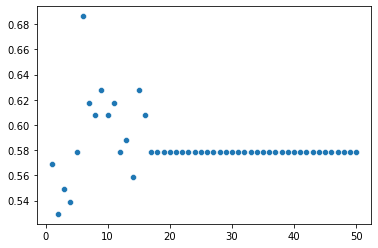

In [30]:
SearchBestTree(x_train, y_train, x_test, y_test, lim_sup = 50)

In [36]:
clftree4 = DecisionTreeClassifier(max_depth = 6, random_state = 0)
clftree4.fit(x_train, y_train)
predy = clftree4.predict(x_test)
accuracy_score(y_test, predy)

0.6862745098039216

In [37]:
confusion_matrix(y_test, predy)

array([[26, 18],
       [14, 44]], dtype=int64)

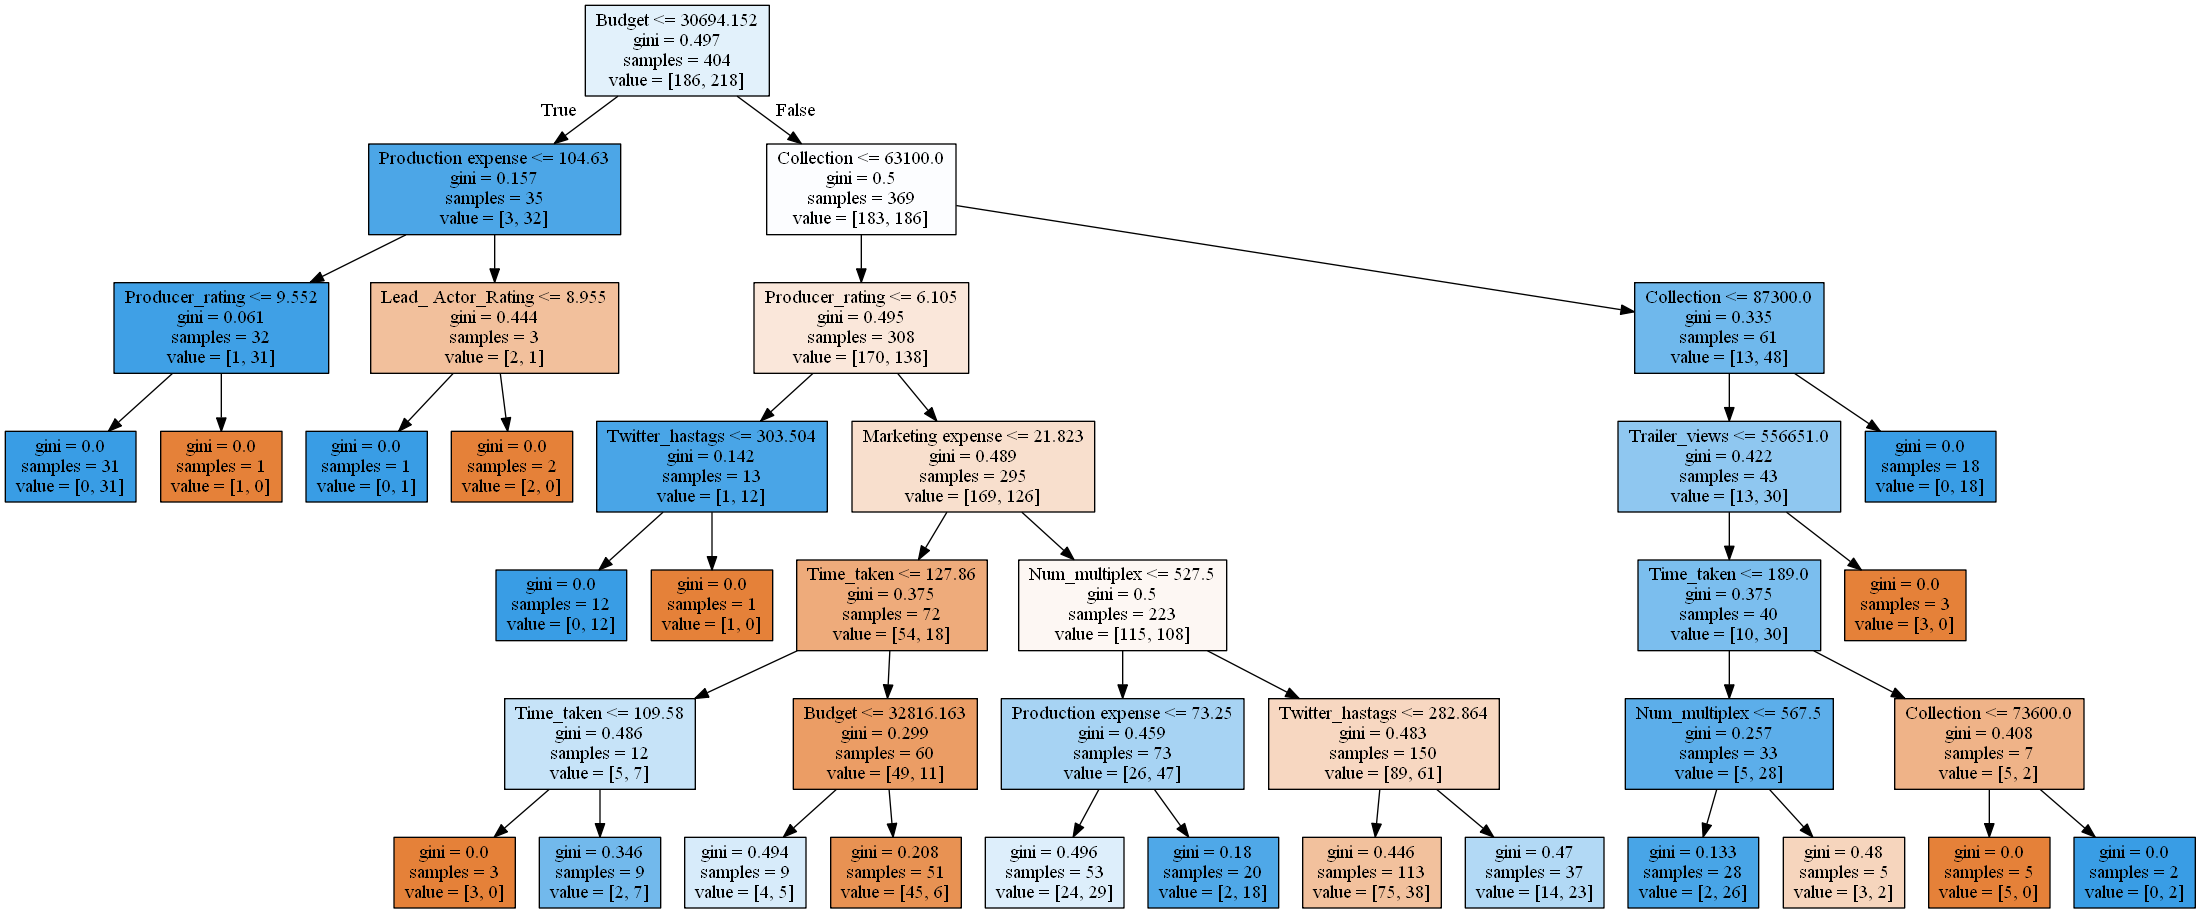

In [38]:
dot_data = export_graphviz(clftree4, out_file = None, feature_names = x_train.columns, filled = True)
graph4 = pydotplus.graph_from_dot_data(dot_data)
Image(graph4.create_png())

Using only a tree classifier with a algorithm to search the best, I can obtain an accuracy of 68,63% 